# Trabajo final de Cosmología de Presición
*para la aprobación de la materia Cosmología de Presición dictada por Claudia Scóccola en 2024*

*por Juan I. Iribarren.*

## **Tema 1:** Evolución del Universo homogéneo y en expansión (background):

1) Elija un conjunto de parámetros cosmológicos, y grafique la evolución del parámetro de Hubble.
Muestre a través de un gráfico, cómo depende de cada uno de los parámetros de densidad.
2) Grafique las distancias de luminosidad, de diámetro angular, y la distancia comóvil.
3) Grafique $a(t)$
4) Grafique $z(t)$, y tome ciertos valores representativos de momentos claves de la evolución del
Universo (BBN, equality, recombinación, reionización, pico de formación estelar (sSFR), época
actual, y algún otro momento que considere relevante), y exprese dichas épocas en tiempo cósmico,
en redshift $z$, en valor del factor de escala $a$, y en escala de energía medida en temperatura $K$.
---

Comenzaré por algunos pasos que seran comunes a todo el desarrollo del código. primero, importaré algunas librerías.

In [2]:

import classy as classy
from classy import Class
import matplotlib.pyplot as plt
import matplotlib as mat
import numpy as np


Importaré el valor de velocidad de la luz de Scipy y luego lo convierto de $m/s$ a $km/h$. Este nos permitirá pasar de unidades naturales a unidades del SI.

In [ ]:
import scipy.constants.speed_of_light as c
c = c/1000

Ahora crearé un diccionario que contenga los siguientes parametros cosmologicos extraídos de *Planck 2018 results. VI. Cosmological parameters* <sup>[1]</sup>:

+ $H0 = 100 h = 67,32$
+ $\omega_b=\Omega_b h^2= 0,02238$
+ $\omega_{c}=\Omega_{c} h^2= 0,12011$

Este dicionario será de utilidad para ingresar estos parametros como input del código de CLASS y para algunos otros cálculos.

Podemos recalcular a partir de https://arxiv.org/pdf/2309.10034 

In [3]:
planck_18 = dict()
planck_18['ombh2'] = 0.02238   ## Omega_b * h**2
planck_18['omch2'] = 0.12011  ## Omega_c * h**2
planck_18['H0'] = 67.32   ##   H0 = 100h
planck_18['h'] = planck_18['H0']/100
planck_18['Oc'] = planck_18['omch2']/planck_18['h']**2
planck_18['Ob'] = planck_18['ombh2']/planck_18['h']**2

Para comenzar con el inciso 1, tomaré el diccionario anterior y armaré 5 diccionarios con el formato apropiado para ser input de CLASS. `PlanckParams` contendrá los valores originales (fiduciales) de nuestro universo. También crearé dos listas con dos diccionarios cada una, `ModOb` y `ModOc` que tendrán el  mismo formato que `PlanckParams` pero variarán en $\pm 50\%$ los valores de $\Omega_b$ y $\Omega_c$, respectivamente.

In [4]:
PlanckParams = {'H0': planck_18['H0'], 'Omega_b': planck_18['Ob'], 'Omega_cdm': planck_18['Oc']}

ModOb = [
    {'H0': planck_18['H0'], 'Omega_b': planck_18['Ob']*0.5, 'Omega_cdm': planck_18['Oc']},
    {'H0': planck_18['H0'], 'Omega_b': planck_18['Ob']*1.5, 'Omega_cdm': planck_18['Oc']}
]

ModOc = [
    {'H0': planck_18['H0'], 'Omega_b': planck_18['Ob'], 'Omega_cdm': planck_18['Oc']*0.5},
    {'H0': planck_18['H0'], 'Omega_b': planck_18['Ob'], 'Omega_cdm': planck_18['Oc']*1.5}
]

Prepararemos ahora una función que a partir de un set de parámetros permite extraer de CLASS las listas generadas por background.c y los mismos parámetros ingresados (esto último facilitará el código más adelante).

In [5]:
def GetBackground(parameters):
    cosmo = Class()
    cosmo.empty()
    cosmo.set(parameters)
    cosmo.compute()
    
    return cosmo.get_background(), parameters

Ahora calcularé el Background de cada uno de los 5 diccionarios de input creados (`PlanckParams` y sus modificaciones).

In [6]:
BG_Planck, Pm_Planck = GetBackground(PlanckParams)
BG_ModOc = [GetBackground(x)[0] for x in ModOc]
Pm_ModOc = [GetBackground(x)[1]["Omega_b"] for x in ModOc]
BG_ModOb = [GetBackground(x)[0] for x in ModOb]
Pm_ModOb = [GetBackground(x)[1]["Omega_cdm"] for x in ModOc]

dict_keys(['z', 'proper time [Gyr]', 'conf. time [Mpc]', 'H [1/Mpc]', 'comov. dist.', 'ang.diam.dist.', 'lum. dist.', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_b', '(.)rho_cdm', '(.)rho_lambda', '(.)rho_ur', '(.)rho_crit', '(.)rho_tot', '(.)p_tot', '(.)p_tot_prime', 'gr.fac. D', 'gr.fac. f'])

Podemos observar qué objetos devuelve el codigo bacground.c aplicando el método `.keys()`. Vemos que nos provee del $z$, $t$, $\eta$, $H$ en unidades naturales, la distancia comovil, angular y de luminosidad, entre otros.

In [ ]:

BG_Planck.keys()

Ahora sí, graficaré $H(z)$. En el primer recuadro para todos los $z$ que devuelve background.c $z\in [10^{-2},10^{14}]$, luego haré zoom en la zona de interés $z\in [10^{-2},10^1]$, graficandolo en escala logarítimica y lineal. Este proceso se hará tanto con los $H$ y $z$ devueltos por `PlackParams` y por `ModOb`, es decir, para los parámetros cosmologicos obtenidos por Planck y suponiendo valores mayores y menores en un 50%.

Text(0, 0.5, '$H(z)$ / $\\frac{m}{s} \\frac{1}{Mpc}$')

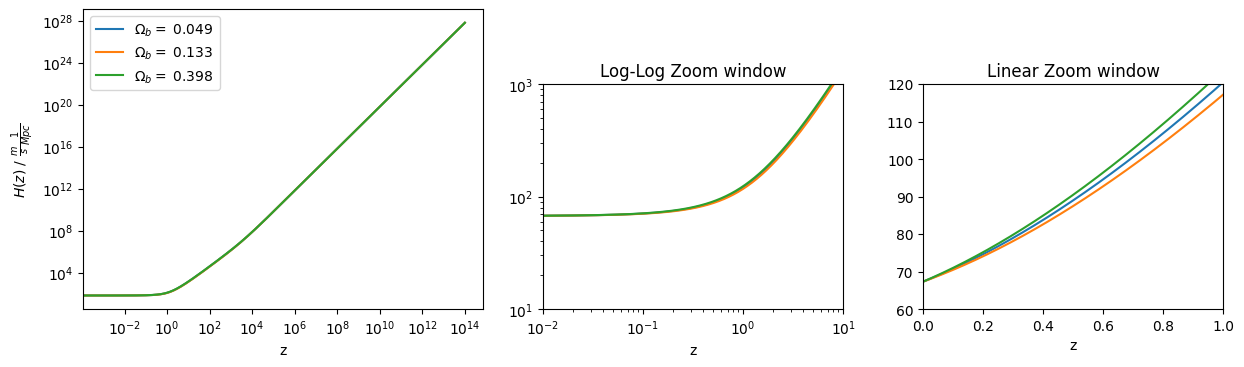

In [7]:
fig = plt.figure(1, figsize=(4, 3))
ax1 = fig.add_axes([0, 0, 1, 1])

ax1.loglog(BG_Planck["z"], BG_Planck["H [1/Mpc]"]*c, label = r"$\Omega_b =$ "+str(round(Pm_Planck["Omega_b"],3)))

j = 0
for BG_Mod in BG_ModOb:
    ax1.loglog(BG_Mod["z"], BG_Mod["H [1/Mpc]"]*c, label = r"$\Omega_b =$ "+str(round(Pm_ModOb[j],3)))
    j = j+1

ax1.set(autoscale_on=True)
ax1.legend()

ax2 = fig.add_axes([1.15, 0, 0.75, 0.75])

ax2.loglog(BG_Planck["z"], BG_Planck["H [1/Mpc]"]*c)

for BG_Mod in BG_ModOb:
    ax2.loglog(BG_Mod["z"], BG_Mod["H [1/Mpc]"]*c)
    
ax2.set(xlim=(1e-2, 1e1), ylim=(1e1, 1e3), autoscale_on=False, title='Log-Log Zoom window')

ax3 = fig.add_axes([2.10, 0, 0.75, 0.75])

ax3.plot(BG_Planck["z"], BG_Planck["H [1/Mpc]"]*c)

for BG_Mod in BG_ModOb:
    ax3.plot(BG_Mod["z"], BG_Mod["H [1/Mpc]"]*c)
    
ax3.set(xlim=(0, 10), ylim=(60, 120), autoscale_on=False, title='Linear Zoom window')

for ax in fig.axes:
    ax.set_xlabel("z")

ax1.set_ylabel(r"$H(z)$ / $\frac{m}{s} \frac{1}{Mpc}$")
    

Podemos apreciar que hoy en $z\ll 1$, independientemente del valor de $\Omega_b$, $H$ tiende a $H_0 \sim 67$, lo cual es razonable. A medida que z se acerca a 1 podemos notar la diferencia en $H$, creciendo con $\Omega_c$.

Ahora repetire el proceso, pero esta vez variando $\Omega_c$ en $\pm 50\%$.

Text(0, 0.5, '$H(z)$ / $\\frac{m}{s} \\frac{1}{Mpc}$')

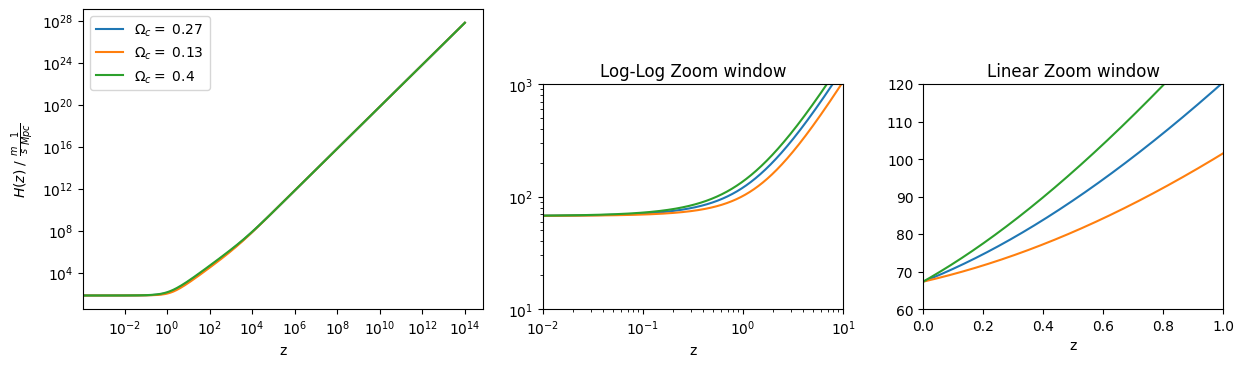

In [8]:
fig = plt.figure(1, figsize=(4, 3))
ax1 = fig.add_axes([0, 0, 1, 1])

ax1.loglog(BG_Planck["z"], BG_Planck["H [1/Mpc]"]*c, label = r"$\Omega_c =$ "+str(round(Pm_Planck["Omega_cdm"],2)))

j = 0
for BG_Mod in BG_ModOc:
    ax1.loglog(BG_Mod["z"], BG_Mod["H [1/Mpc]"]*c, label = r"$\Omega_c =$ "+str(round(Pm_ModOb[j],2)))
    j = j+1
ax1.set(autoscale_on=True)
ax1.legend()

ax2 = fig.add_axes([1.15, 0, 0.75, 0.75])

ax2.loglog(BG_Planck["z"], BG_Planck["H [1/Mpc]"]*c)

for BG_Mod in BG_ModOc:
    ax2.loglog(BG_Mod["z"], BG_Mod["H [1/Mpc]"]*c)
    
ax2.set(xlim=(1e-2, 1e1), ylim=(1e1, 1e3), autoscale_on=False, title='Log-Log Zoom window')

ax3 = fig.add_axes([2.10, 0, 0.75, 0.75])

ax3.plot(BG_Planck["z"], BG_Planck["H [1/Mpc]"]*c)

for BG_Mod in BG_ModOc:
    ax3.plot(BG_Mod["z"], BG_Mod["H [1/Mpc]"]*c)
    
ax3.set(xlim=(0, 1), ylim=(60, 120), autoscale_on=False, title='Linear Zoom window')

for ax in fig.axes:
    ax.set_xlabel("z")

ax1.set_ylabel(r"$H(z)$ / $\frac{m}{s} \frac{1}{Mpc}$")

En un principio se aprecia que $H$ cuando $z\ll 1$ tiende al $H_0$ como esperabamos y vemos que, independientemente de $\Omega_c$, los valores de $H$ crece con $z$ para grandes $z$. En otras palabras, las diferencias de $H$ dadas por $\Omega_c$ parecen ser significantes unicamente cuando $z\sim 1$. Alli notamos que $H$ crece con $\Omega_c$ y además el momento en que $H(Z)$ se hace apreciablemente distinto de $H0$ se adelanta cuanto mayor es $\Omega_c$. 

Ahora procederemos al inciso 2. Para ello usaremos los valores devueltos por el background.c calculado a partir de los parámetros de planck y la misma estructura de graficos que hemos construido antes. background.c nos devuelve las distancias comoviles, de luminosidad y angular asi que podremos graficarlas facilmente. Comencemos por la distancia de luminosidad: 

Text(0, 0.5, '$d_L(z)$ / m')

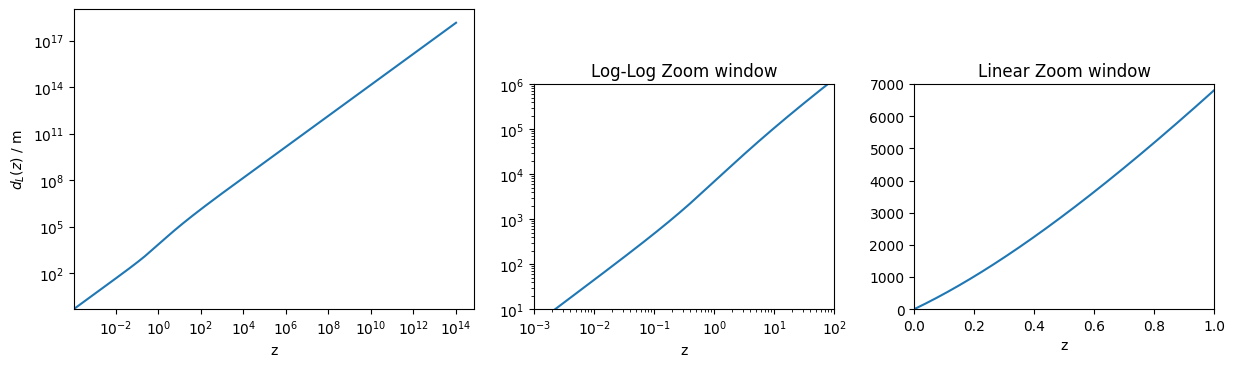

In [9]:
fig = plt.figure(1, figsize=(4, 3))
ax1 = fig.add_axes([0, 0, 1, 1])

ax1.loglog(BG_Planck["z"], BG_Planck["lum. dist."])

ax1.set(autoscale_on=True)

ax2 = fig.add_axes([1.15, 0, 0.75, 0.75])

ax2.loglog(BG_Planck["z"], BG_Planck["lum. dist."])

ax2.set(xlim=(1e-3, 1e2), ylim=(1e1, 1e6), autoscale_on=False, title='Log-Log Zoom window')

ax3 = fig.add_axes([2.10, 0, 0.75, 0.75])

ax3.plot(BG_Planck["z"], BG_Planck["lum. dist."])

ax3.set(xlim=(0, 100), ylim=(0, 7e3), autoscale_on=False, title='Linear Zoom window')


for ax in fig.axes:
    ax.set_xlabel("z")

ax1.set_ylabel(r"$d_L(z)$ / m")

Vemos que $d_L$ crece proporcionalmente a $z$ aunque tiene un pequeño cambio de pendiente en $z=0.5$ y retorna a la pendiente original más adelante.
Procederé haciendo lo mismo con la distancia angular, $d_\theta$.

Text(0, 0.5, '$d_\\theta(z)$ / m')

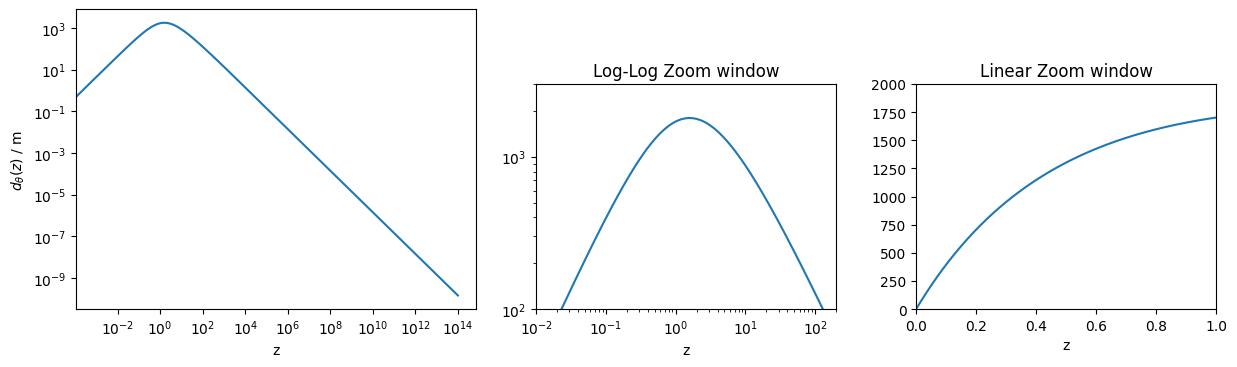

In [10]:
fig = plt.figure(1, figsize=(4, 3))
ax1 = fig.add_axes([0, 0, 1, 1])

ax1.loglog(BG_Planck["z"], BG_Planck['ang.diam.dist.'])

ax1.set(autoscale_on=True)


ax2 = fig.add_axes([1.15, 0, 0.75, 0.75])

ax2.loglog(BG_Planck["z"], BG_Planck['ang.diam.dist.'])

ax2.set(xlim=(1e-2, 2e2), ylim=(1e2, 3e3), autoscale_on=False, title='Log-Log Zoom window')

ax3 = fig.add_axes([2.10, 0, 0.75, 0.75])

ax3.plot(BG_Planck["z"], BG_Planck['ang.diam.dist.'])

ax3.set(xlim=(0, 100), ylim=(0, 2e3), autoscale_on=False, title='Linear Zoom window')


for ax in fig.axes:
    ax.set_xlabel("z")

ax1.set_ylabel(r"$d_\theta(z)$ / m")

Encontramos que $d_\theta(z)$ tiene un máximo en $z\sim 1$. AHora armamos el mismo gráfico para la distancia comovil $r_{com}$

Text(0, 0.5, '$\\eta(z)$ / m')

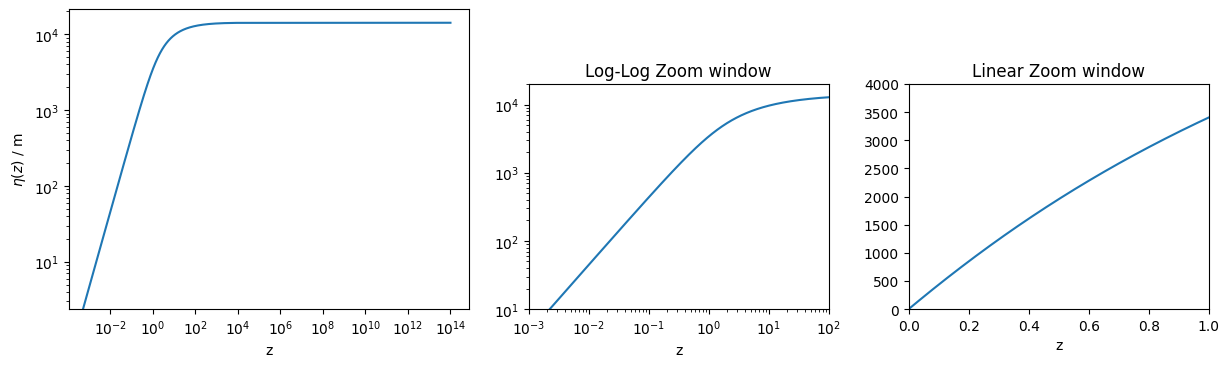

In [11]:
fig = plt.figure(1, figsize=(4, 3))
ax1 = fig.add_axes([0, 0, 1, 1])

ax1.loglog(BG_Planck["z"], BG_Planck['comov. dist.'])
ax1.set(autoscale_on=True)

ax2 = fig.add_axes([1.15, 0, 0.75, 0.75])

ax2.loglog(BG_Planck["z"], BG_Planck['comov. dist.'])

ax2.set(xlim=(1e-3, 1e2), ylim=(1e1, 2e4), autoscale_on=False, title='Log-Log Zoom window')

ax3 = fig.add_axes([2.10, 0, 0.75, 0.75])

ax3.plot(BG_Planck["z"], BG_Planck['comov. dist.'])

ax3.set(xlim=(0, 100), ylim=(0, 4e3), autoscale_on=False, title='Linear Zoom window')

for ax in fig.axes:
    ax.set_xlabel("z")

ax1.set_ylabel(r"$r_{com}(z)$ / m")

Podemos ver que esta crece rápidamente desde $z\to 0$ hasta $z\sim 1$ y luego continua su crecimiento a un ritmo menor. Propongo ahora hacer la comparación entre las tres distancias presentadas.

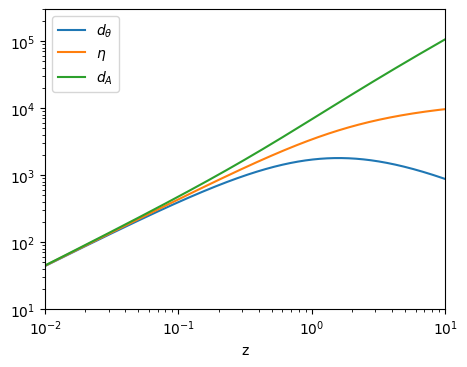

In [12]:
fig = plt.figure(1, figsize=(4, 3))
ax1 = fig.add_axes([0, 0, 1, 1])

ax1.loglog(BG_Planck["z"], BG_Planck['ang.diam.dist.'], label = r"$d_\theta$")
ax1.loglog(BG_Planck["z"], BG_Planck['comov. dist.'], label = r"$r_{com}$")
ax1.loglog(BG_Planck["z"], BG_Planck["lum. dist."], label = r"$d_L$")
ax1.set_xlabel("z")
ax1.set(xlim=(1e-2, 1e2), ylim=(1e1, 3e5), autoscale_on=False)
ax1.legend()


Aqui encontramos que las tres distancias analizadas (angular, comóvil y de luminosidad) tienen comportamientos similares en $z<1$ pero diferentes cuando $z>1$, siendo $d_\theta$ decreciente, $r_{com}$ casi constante y $d_L$ creciente. con esto hemos podido recuperar la figura XX del Dodelson.

Siguiendo con el inciso 3, precisamos graficar $a(t)$, para ello necesitamos dos listas o arrrays, uno de $t$ y otro de sus correspondientes valores de $a$. La primera se puede obtener desde el codigo de background.c pues tiene un parámetro llamado tiempo propio. Tambien en background.c teniamos los $z$ y usando que $a=\frac{1}{1+z}$ podemos obtener una lista de $a$ con correspondencia 1 a 1 con la lista de $t$.

Text(0, 0.5, '$a(t)$')

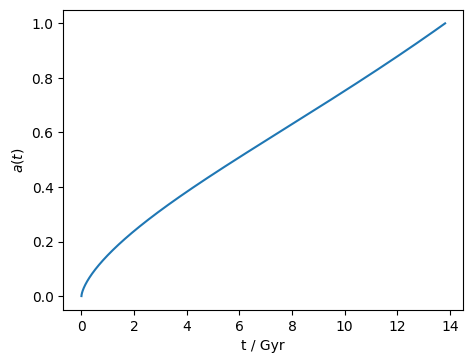

In [13]:
fig = plt.figure(1, figsize=(4, 3))
ax1 = fig.add_axes([0, 0, 1, 1])

a = 1/(1+(BG_Planck["z"]))

ax1.plot(BG_Planck["proper time [Gyr]"], a)

ax1.set_xlabel("t / Gyr")

ax1.set_ylabel(r"$a(t)$")

Podemos ver que $a$ experimenta un crecimiento repentino en los primeros momentos del universo, lo que conocemos como inflación. En este punto el $a\propto t^{1/2}$ y esto implica que $\dot{a} \to \infty$ cuando $t\to 0$ y llegando a la epoca actual se empieza a notar el crecimiento exponencial del factor de crecimiento, puesto que recordemos $a \propto e^{H_0t}$

Para el último inciso, comenzaré por establecer los momentos relevantes solicitados a partir de su z, obtenido desde la bibliografía <sup>[1-3]</sup>, y armando un diccionario a partir de eso.

In [14]:
z_BBN = 10e10 #https://ned.ipac.caltech.edu/level5/March04/Steigman3/paper.pdf
z_equality = 3407 #https://arxiv.org/pdf/1807.06209
z_recombinacion = 7.68 #https://arxiv.org/pdf/1807.06209
z_reionizacion = 6 #https://arxiv.org/pdf/1403.0007 , p.58 
z_sSFR = 1.85 #https://arxiv.org/pdf/1403.0007 , p.63 
z_hoy = 0 

z_relevant = {"BBN":z_BBN, "eq":z_equality,
    "recombination":z_recombinacion,
    "reionization":z_reionizacion,
    "sSFR":z_sSFR,"today":z_hoy}

Ahora graficaré $z(t)$ y añadiré los momentos del diccionario que elaboré previamente.

Text(0, 0.5, '$z(t)$')

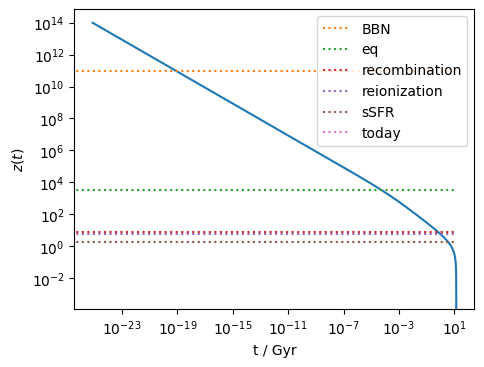

In [15]:
fig = plt.figure(1, figsize=(4, 3))
ax1 = fig.add_axes([0, 0, 1, 1])

ax1.loglog(BG_Planck["proper time [Gyr]"], BG_Planck["z"])

for label, y in z_relevant.items():
    ax1.plot([0, 13.8], [y]*2, linestyle=":", label = label)

ax1.legend()

ax1.set_xlabel("t / Gyr")

ax1.set_ylabel(r"$z(t)$")

ax1.grid()


Como podemos ver, $z$ describe una curva monotamente decreciente y cuya pendiente se vuelve más necgativa cerca de hoy, $t\sim 13.8\ Gyr$. La recombinación se da en $z\sim 10^{11}$ que pareciera equivaler a $t \sim 10^{-19}\ Gyr$. Equality se da en $z\sim 3400$ y parece corresponder a $t \sim 10^{-4}\ Gyr$. Recombinación, reionización y sSFR se dan entre $0,1\ Gyr$ y $1 Gyr$. Naturalmente, la epoca actual no se ve en el grafico puesto que el mismo está en escala logarítmica para mejor visualización y $z_{hoy}=0$.

Antes de hacer la tabla de conversión, usaré una función de interpolación de Scipy para poder obtener la inversa de la función que se ve en el grfico anterior. Es decir, usaré una función de interpolación para poder evaluar z en distintos tiempos.

In [16]:
from scipy.interpolate import interp1d

t_of_z = interp1d(BG_Planck["z"], BG_Planck["proper time [Gyr]"])


Ahora construiré la tabla de equivalencias. Comenzaré por crear un DataFrame de Pandas que tenga como indicies a cada uno de los momentos (que también son los indices del diccionario de los z relevantes). Luego ingresaré los valores. Calcularé el $a$ correspondiente a partir de $a=\frac{1}{1+z}$. Considerando que $T\propto \frac{1}{a}$ y conociendo que $T_{hoy}=2,7255\ K$ por el CMB y $a_{hoy}=1$ por normalización, podemos obtener $T$ a partit de $a$. Por último, usando la función creada antes, podemos encontrar el tiempo propio $t$ para los $z$ relevantes.

In [17]:
from pandas import DataFrame

Equivalences = DataFrame(index= z_relevant.keys())

Equivalences["z"] = z_relevant.values()

Equivalences["a"] = 1/(1+Equivalences["z"])

Equivalences["T [K]"] = 2.7255/Equivalences["a"]

Equivalences["t [Gyr]"] = t_of_z(Equivalences["z"])

Equivalences

,z,a,T [K],t [Gyr]
BBN,1.000000e+11,1.000000e-11,2.725500e+11,7.559521e-20
eq,3.407000e+03,2.934272e-04,9.288504e+03,5.083976e-05
recombination,7.680000e+00,1.152074e-01,2.365734e+01,6.724948e-01
reionization,6.000000e+00,1.428571e-01,1.907850e+01,9.287442e-01
sSFR,1.850000e+00,3.508772e-01,7.767675e+00,3.530860e+00
today,0.000000e+00,1.000000e+00,2.725500e+00,1.381435e+01


Finalmente, me parece interesante usar las mismas relaciones para graficar $z$, $a$ y $T$ como funciones de $t$.

Text(0.5, 0, 't / Gyr')

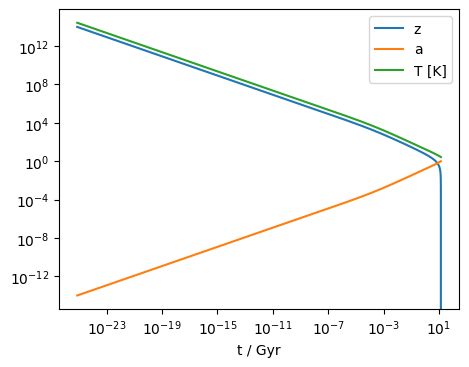

In [18]:
fig = plt.figure(1, figsize=(4, 3))
ax1 = fig.add_axes([0, 0, 1, 1])

ax1.loglog(BG_Planck["proper time [Gyr]"], BG_Planck["z"], label = "z")
ax1.loglog(BG_Planck["proper time [Gyr]"], 1/(1+BG_Planck["z"]), label = "a")
ax1.loglog(BG_Planck["proper time [Gyr]"], 2.7255*(1+BG_Planck["z"]), label = "T [K]")

ax1.legend()

ax1.set_xlabel("t / Gyr")


## **Tema 2:** Formación de estructuras

In [43]:
#############################################
#
# value of k that we want to follow in [1/Mpc]
#
k = 0.5  # 1/Mpc
#
# Cosmological parameters and other CLASS parameters
#
common_settings = {# we need to set the output field to something although
                   # the really releveant outpout here will be set with 'k_output_values'
                   'output':'mPk,mTk',
                   # value of k we want to polot in [1/Mpc]
                   'k_output_values':k,
                   # LambdaCDM parameters
                   'h':0.67810,
                   'omega_b':0.02238280,
                   'omega_cdm':0.1201075,
                   'A_s':2.100549e-09 ,
                   'n_s':0.9660499,
                   'tau_reio':0.05430842,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.2454,
                   # other options and settings
                   'compute damping scale':'yes', # needed to output the time of damping scale crossing
                   'gauge':'newtonian'}  
##############
#    
# call CLASS
#
M = Class()
M.empty()
M.set(common_settings)
M.compute()
#
# load perturbations
#
all_k = M.get_perturbations()  # this potentially constains scalars/tensors and all k values


In [47]:
all_k["scalar"][0]["phi"]

array([0.6993758 , 0.6993758 , 0.6993758 , ..., 0.00403391, 0.00384741,
       0.00362845])

In [56]:
all_k["scalar"][0].keys()

dict_keys(['tau [Mpc]', 'a', 'delta_g', 'theta_g', 'shear_g', 'pol0_g', 'pol1_g', 'pol2_g', 'delta_b', 'theta_b', 'psi', 'phi', 'delta_ur', 'theta_ur', 'shear_ur', 'delta_cdm', 'theta_cdm'])

## **Tema 3:** Fondo Cósmico de Radiación

In [20]:
#####################################################
#
# Cosmological parameters and other CLASS parameters
#
#####################################################
common_settings = {# LambdaCDM parameters
                   'h':0.67810,
                   'omega_b':0.02238280,
                   'omega_cdm': 0.1201075,
                   'A_s':2.100549e-09,
                   'tau_reio': 0.05430842}

l_max_scalars = 3000
l_max_tensors = 600

# Note that for l_max_tensors =600 we can keep default precision,
# while for for l_max_tensors = 3000 we would need to import many high precision settings from the file cl_ref.pre    

In [21]:
###############
#    
# call CLASS : scalars only
#
###############
#
M = Class()
M.set(common_settings)
M.set({'output':'tCl,pCl','modes':'s','lensing':'no','n_s':0.9660499,
       'l_max_scalars':l_max_scalars})
M.compute()
cls = M.raw_cl(l_max_scalars)

In [22]:
###############
#    
# call CLASS : tensors only
#
###############
#
M.empty() # reset input parameters to default, before passing a new parameter set
M.set(common_settings)
M.set({'output':'tCl,pCl','modes':'t','lensing':'no','r':0.1,'n_t':0,
       'l_max_tensors':l_max_tensors})
M.compute()
clt = M.raw_cl(l_max_tensors)

In [23]:
###############
#    
# call CLASS : scalars + tensors (only in this case we can get the correct lensed ClBB)
#
###############
#
M.empty() # reset input parameters to default, before passing a new parameter set
M.set(common_settings)
M.set({'output':'tCl,pCl,lCl','modes':'s,t','lensing':'yes','n_s':0.9660499,'r':0.1,'n_t':0,
       'l_max_scalars':l_max_scalars,'l_max_tensors':l_max_tensors})
M.compute()
cl_tot = M.raw_cl(l_max_scalars)
cl_lensed = M.lensed_cl(l_max_scalars)

In [52]:
# modules and esthetic definitions for the plots
#
# uncomment to get plots displayed in notebook
%matplotlib inline
#
import matplotlib
import matplotlib.pyplot as plt
#
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
#matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

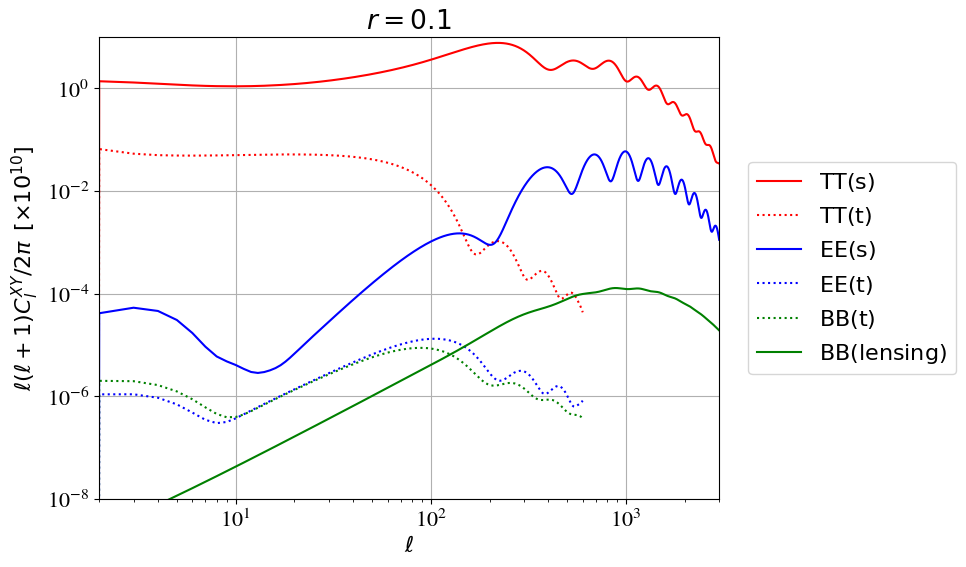

In [53]:
#################
#
# plotting
#
#################
#
plt.xlim([2,l_max_scalars])
plt.ylim([1.e-8,10])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi \,\,\, [\times 10^{10}]$")
plt.title(r"$r=0.1$")
plt.grid()
#
ell = cl_tot['ell']
ellt = clt['ell']
factor = 1.e10*ell*(ell+1.)/2./np.pi
factort = 1.e10*ellt*(ellt+1.)/2./np.pi
#
plt.loglog(ell,factor*cls['tt'],'r-',label=r'$\mathrm{TT(s)}$')
plt.loglog(ellt,factort*clt['tt'],'r:',label=r'$\mathrm{TT(t)}$')
plt.loglog(ell,factor*cls['ee'],'b-',label=r'$\mathrm{EE(s)}$')
plt.loglog(ellt,factort*clt['ee'],'b:',label=r'$\mathrm{EE(t)}$')
plt.loglog(ellt,factort*clt['bb'],'g:',label=r'$\mathrm{BB(t)}$')
plt.loglog(ell,factor*(cl_lensed['bb']-cl_tot['bb']),'g-',label=r'$\mathrm{BB(lensing)}$')
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))

In [26]:
def Get_Cls(params, l_max_s, l_max_t):
    M.empty()
    M.set(params)
    M.set({'output':'tCl,pCl','modes':'s','lensing':'no','n_s':0.9660499,
        'l_max_scalars':l_max_s})
    M.compute()
    Cls = M.raw_cl(l_max_s)
    
    M.empty() # reset input parameters to default, before passing a new parameter set
    M.set(params)
    M.set({'output':'tCl,pCl','modes':'t','lensing':'no','r':0.1,'n_t':0,
        'l_max_tensors':l_max_t})
    M.compute()
    Clt = M.raw_cl(l_max_t)
    
    M.empty() # reset input parameters to default, before passing a new parameter set
    M.set(params)
    M.set({'output':'tCl,pCl,lCl','modes':'s,t','lensing':'yes','n_s':0.9660499,'r':0.1,'n_t':0,
        'l_max_scalars':l_max_s,'l_max_tensors':l_max_t})
    M.compute()
    Cl_tot = M.raw_cl(l_max_s)
    Cl_lensed = M.lensed_cl(l_max_s)
    
    ell = Cl_tot['ell']
    ellt = Clt['ell']
    factor = 1.e10*ell*(ell+1.)/2./np.pi
    factort = 1.e10*ellt*(ellt+1.)/2./np.pi

    ScalarAnisotropies = {"TT_s" : factor*Cls['tt'],
                        "EE_s" : factor*Cls['ee'],
                        "BB_lens" : factor*(Cl_lensed['bb']-Cl_tot['bb'])
                        }

    TensorAnisotropies = {"TT_t" : factort*Clt['tt'],
                        "EE_t" : factort*Clt['ee'],
                        "BB_t" : factort*Clt['bb']
                        }
    
    return ell, ellt, ScalarAnisotropies, TensorAnisotropies

In [27]:
PlanckParams = {# Planck parameters
               'H0':planck_18['H0'],
               'Omega_b':planck_18['Ob'],
               'Omega_cdm': planck_18['Oc'],
               'A_s':2.100549e-09,
               'tau_reio': 0.05430842}

ell, ellt, PlanckAni_s, PlanckAni_t = Get_Cls(PlanckParams, 3000, 600)


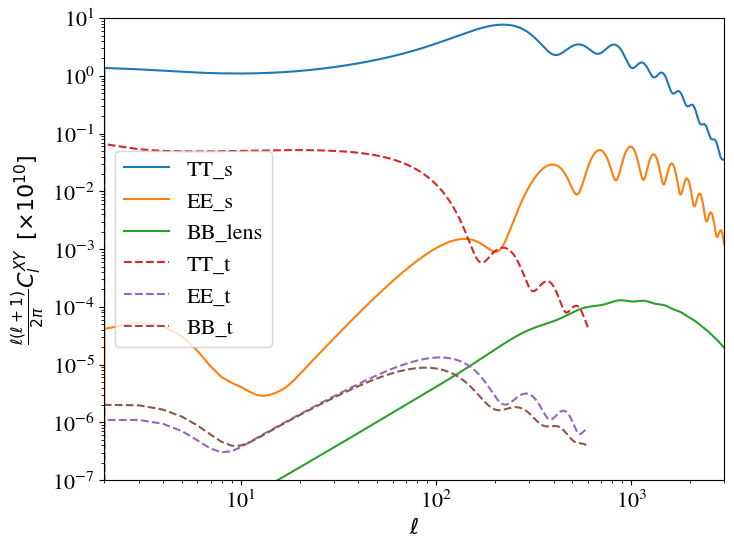

In [28]:

for key in PlanckAni_s.keys():
    plt.loglog(ell, PlanckAni_s[key], "-", label = str(key))

for key in PlanckAni_t.keys():
    plt.loglog(ellt, PlanckAni_t[key], "--", label = str(key))

plt.xlim([2,l_max_scalars])
plt.ylim([1.e-7,10])

plt.xlabel(r"$\ell$")
plt.ylabel(r"$\frac{\ell (\ell+1)}{2\pi} C_l^{XY} \,\,\, [\times 10^{10}]$")
plt.legend()

Habiendo obtenido los espectros, pocederé a encontrar los máximos locales y la amplitud en esos puntos. Para ello, me valdré de la función `find_peaks` de Scipy sin ningun parámetro de filtro para los máximos. La aplicaré a cada uno de los espectros de angulares mostrados anteriormente y guadaré la lista de los $\ell$ correspondientes a esos máximos en un diccionario, separando los escalares y los tensoriales.

In [29]:
from scipy.signal import find_peaks

ScalarPeaks = {}
TensorPeaks = {}

for key in PlanckAni_s.keys():
    peaks_for_key, peak_prop = find_peaks(PlanckAni_s[key])
    ScalarPeaks[key] = peaks_for_key

for key in PlanckAni_t.keys():
    peaks_for_key, peak_prop = find_peaks(PlanckAni_t[key])
    TensorPeaks[key] = peaks_for_key


Ahora volveré a realizar la última figura, agregando además los máximos encontrados.

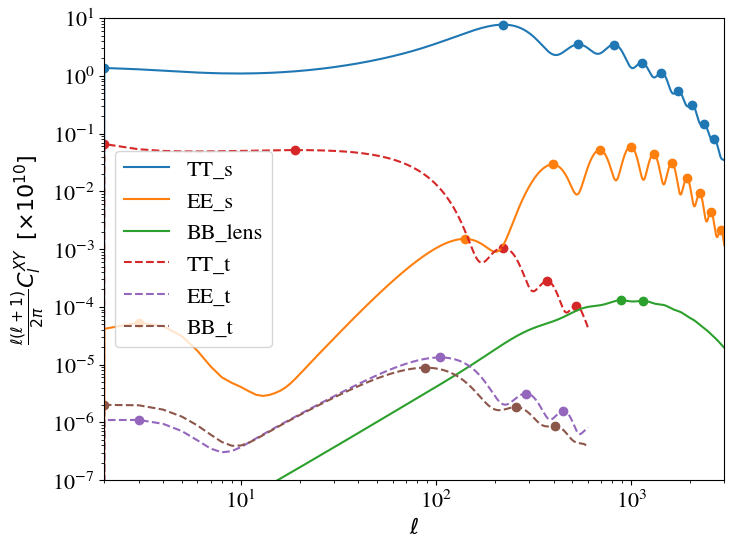

In [30]:
for key in PlanckAni_s.keys():
    plt.loglog(ell, PlanckAni_s[key], "-", label = str(key))

for key in PlanckAni_t.keys():
    plt.loglog(ellt, PlanckAni_t[key], "--", label = str(key))

for key in ScalarPeaks.keys():
    plt.scatter(ScalarPeaks[key], PlanckAni_s[key][ScalarPeaks[key]])

for key in TensorPeaks.keys():
    plt.scatter(TensorPeaks[key], PlanckAni_t[key][TensorPeaks[key]])

plt.xlim([2,3000])
plt.ylim([1.e-7,10])

plt.xlabel(r"$\ell$")
plt.ylabel(r"$\frac{\ell (\ell+1)}{2\pi} C_l^{XY} \,\,\, [\times 10^{10}]$")
plt.legend()

El máximo de menor $\ell$ se encuentra a grandes escalas angulares, en el *plateu*, por lo que no es el máximo acústico. A partir del segundo máximo encontrado se ven los máximos acústicos.
Habiendo corroborado que hemos encontrado los máximos de cada uno de los espectros, pasaré a colocarlos en una tabla y a  calcular los cocientes entre las amplitudes de los picos de temperatura y los modos de polarización tanto escalares como tensoriales.

In [31]:
Comparison = DataFrame()

from pandas import concat

for key in ScalarPeaks.keys():
    Comparison = concat([Comparison, DataFrame(PlanckAni_s[key][ScalarPeaks[key]], columns=[key+"_max"])], axis=1)

for key in TensorPeaks.keys():
    Comparison = concat([Comparison, DataFrame(PlanckAni_t[key][TensorPeaks[key]], columns=[key+"_max"])], axis=1)

Comparison["TT_s_max/EE_s_max"] = Comparison["TT_s_max"]/Comparison["EE_s_max"]

Comparison["TT_t_max/EE_t_max"] = Comparison["TT_t_max"]/Comparison["EE_t_max"]

Comparison["TT_t_max/BB_t_max"] = Comparison["TT_t_max"]/Comparison["BB_t_max"]

Comparison


,TT_s_max,EE_s_max,BB_lens_max,TT_t_max,EE_t_max,BB_t_max,TT_s_max/EE_s_max,TT_t_max/EE_t_max,TT_t_max/BB_t_max
0,1.372302,0.000053,0.000130,0.065998,0.000001,2.008886e-06,25662.291510,59864.769193,32852.889064
1,7.720189,0.001504,0.000128,0.051908,0.000013,8.850340e-06,5132.407204,3897.149508,5865.118252
2,3.508896,0.029242,NaN,0.001061,0.000003,1.832792e-06,119.997012,336.102655,578.742965
3,3.483315,0.051935,NaN,0.000280,0.000002,8.676473e-07,67.071045,175.708745,322.694572
4,1.704415,0.059573,NaN,0.000105,NaN,NaN,28.610737,NaN,NaN
5,1.138969,0.043834,NaN,NaN,NaN,NaN,25.983435,NaN,NaN
6,0.545094,0.030498,NaN,NaN,NaN,NaN,17.872967,NaN,NaN
7,0.316834,0.016741,NaN,NaN,NaN,NaN,18.925342,NaN,NaN
8,0.146778,0.009208,NaN,NaN,NaN,NaN,15.939517,NaN,NaN
9,0.079606,0.004342,NaN,NaN,NaN,NaN,18.333078,NaN,NaN


En general, notamos que los máximos escalares tienen amplitudes mayores a las tensoriales dado que $r=0,1$. También la amplitud del espectro angular de perturbaciones en temperatura es mayor a la de modos de polarización E y este, a su vez, es mayor al de modos de polarización B. ESto se condice con la facilidad que existió para encontrar cada una de estas perturbaciones. Primero se encontraron las de la temperatura, ya se encontraron la de los modos E de polarización y continuamos buscando las de los modos B (aunque ya encontramos las perturbaciones escalares producidas por el lensing, que estudiaremos luego).
De la columna `TT_s_max/EE_s_max` encontramos que el segundo máximo (el correspondiente a las oscilaciones acústicas) es miles de veces mayor en la temperatura que en los modos E de polarización. Lo mismo sucede entre las perturbaciones tensoriales de la temperatura, dado por `TT_t_max/EE_t_max	`, y los modos E de polarización o entre ambos modos de polarización, se ve en `TT_t_max/BB_t_max`.

En lo siguiente, definiré una función que (si bien es muy ineficiente) nos permitirá el calculo de los espectros angulares de potencias variando en $\pm 5 \%$ y $\pm 10 \%$ a un único parámetro del modelo $\Lambda CDM$, que podremos seleccionar con una vairable `str`. Además, esta función reordenará las listas de una manera más cómoda para trabajar.

In [32]:
PlanckParams = {# Planck parameters
               'H0':planck_18['H0'],
               'Omega_b':planck_18['Ob'],
               'Omega_cdm': planck_18['Oc'],
               'A_s':2.100549e-09,
               'tau_reio': 0.05430842}

def Variate_param_in_Cls(parameters, param_to_variate):
    TT_s_VarAni = [[], [], [], [], []]
    TT_t_VarAni = [[], [], [], [], []]
    EE_s_VarAni = [[], [], [], [], []]
    EE_t_VarAni = [[], [], [], [], []]
    BB_lens_VarAni = [[], [], [], [], []]
    BB_t_VarAni = [[], [], [], [], []]
    
    j = 0
    
    for i in [0.9, 0.95, 1, 1.05, 1.1]:
        parameters[str(param_to_variate)] = parameters[str(param_to_variate)]*i
        ell, ellt, VarAni_s, VarAni_t = Get_Cls(parameters, 3000, 600)
        TT_s_VarAni[j] = VarAni_s["TT_s"]
        TT_t_VarAni[j] = VarAni_t["TT_t"]
        EE_s_VarAni[j] = VarAni_s["EE_s"]
        EE_t_VarAni[j] = VarAni_t["EE_t"]
        BB_lens_VarAni[j] = VarAni_s["BB_lens"]
        BB_t_VarAni[j] = VarAni_t["BB_t"]
        j = j+1
    
    return {
        "ell" : ell,
        "ellt": ellt,
        "TT_s_VarAni": TT_s_VarAni,
        "TT_t_VarAni": TT_t_VarAni,
        "EE_s_VarAni": EE_s_VarAni,
        "EE_t_VarAni": EE_t_VarAni,
        "BB_lens_VarAni": BB_lens_VarAni,
        "BB_t_VarAni": BB_t_VarAni
    }

Primero usaré la función creada para variar $\Omega_b$.

In [33]:
Variations = Variate_param_in_Cls(PlanckParams, "Omega_b")


Text(0, 0.5, '$\\frac{\\ell (\\ell+1)}{2\\pi} C_l^{XY} \\,\\,\\, [\\times 10^{10}]$')

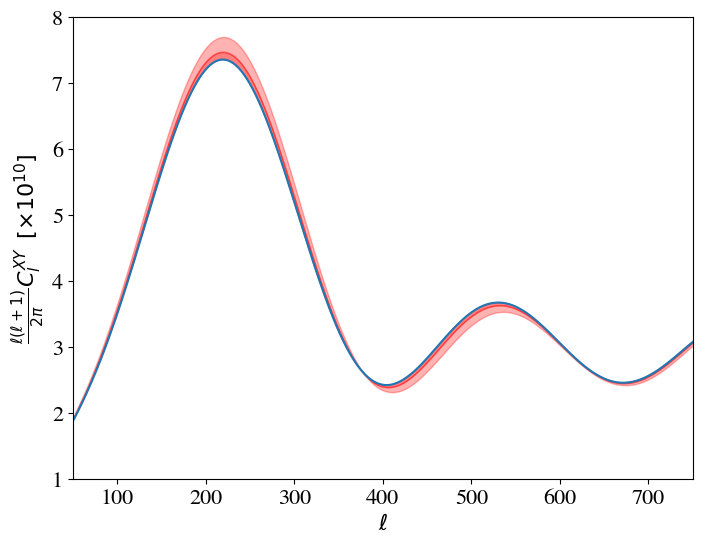

In [34]:

plt.plot(Variations["ell"], Variations["TT_s_VarAni"][2])
plt.fill_between(Variations["ell"], Variations["TT_s_VarAni"][4], Variations["TT_s_VarAni"][0], alpha = 0.3, color = (1,0,0))
plt.fill_between(Variations["ell"], Variations["TT_s_VarAni"][3], Variations["TT_s_VarAni"][1], alpha = 0.5, color = (1,0,0))

plt.xlim([50,750])
plt.ylim([1.e-0,8])

plt.xlabel(r"$\ell$")
plt.ylabel(r"$\frac{\ell (\ell+1)}{2\pi} C_l^{XY} \,\,\, [\times 10^{10}]$")

Como podemos ver, aumentar la componente de materia bariónica del universo puede generar que el primer máximo acústico aumente su amplitud y se desplace hacia un $\ell$ ligeramente mayor. El segundo máximo acústico disminuye su amplitud y también se desplaza a la derecha. Por otro lado, disminuir esta componente no pareciera tener impacto significativo en el espectro.

A continuación usaré la función creada para variar $\Omega_{cdm}$.

In [35]:
Variations = Variate_param_in_Cls(PlanckParams, "Omega_cdm")

Text(0, 0.5, '$\\frac{\\ell (\\ell+1)}{2\\pi} C_l^{XY} \\,\\,\\, [\\times 10^{10}]$')

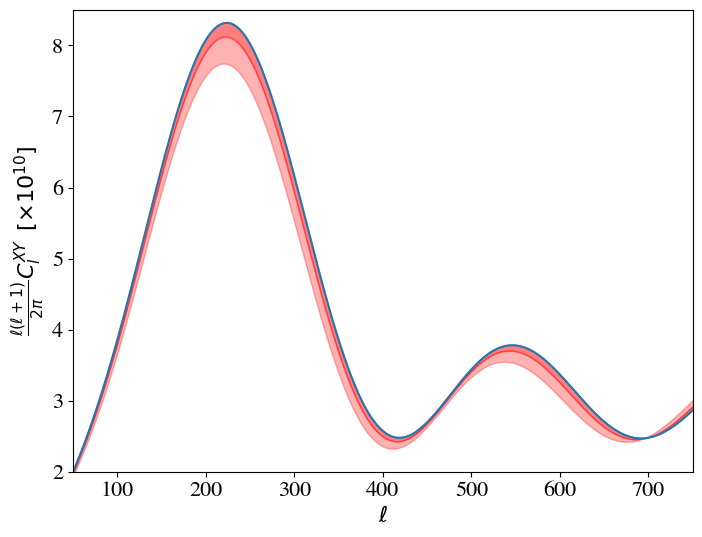

In [36]:

plt.plot(Variations["ell"], Variations["TT_s_VarAni"][2])
plt.fill_between(Variations["ell"], Variations["TT_s_VarAni"][4], Variations["TT_s_VarAni"][0], alpha = 0.3, color = (1,0,0))
plt.fill_between(Variations["ell"], Variations["TT_s_VarAni"][3], Variations["TT_s_VarAni"][1], alpha = 0.5, color = (1,0,0))

plt.xlim([50,750])
plt.ylim([2,8.5])

plt.xlabel(r"$\ell$")
plt.ylabel(r"$\frac{\ell (\ell+1)}{2\pi} C_l^{XY} \,\,\, [\times 10^{10}]$")

Existe un apreciable decesno en la amplitud del espectro cuando $\Omega_{cdm}$ decrece. Además se nota un pequeño desplazamiento a la izquierda de los máximos y mínimos.

## Bibliografía

[1] Aghanim, N., Akrami, Y., Ashdown, M., Aumont, J., Baccigalupi, C., Ballardini, M., ... & Roudier, G. (2020). Planck 2018 results-VI. Cosmological parameters. Astronomy & Astrophysics, 641, A6.
[2] Madau, P., & Dickinson, M. (2014). Cosmic star-formation history. Annual Review of Astronomy and Astrophysics, 52(1), 415-486.
[3] Steigman, G. (2002). Primordial alchemy: from the Big Bang to the present Universe. arXiv preprint astro-ph/0208186.